In [1]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick
import matplotlib.cm as cm
import math
import plotly.graph_objects as go
from collections import OrderedDict
from matplotlib.lines import Line2D  # Import for creating custom legend markers
import json
import copy
import random
import re
import seaborn as sns
import importlib


# Import BW25 packages
import bw2data as bd
import bw2io as bi
import bw2calc as bc
import bw2analyzer as bwa
import brightway2 as bw 
from bw2calc import LeastSquaresLCA

In [2]:
from  standards import *
import Monte_Carlo as MC
import life_cycle_assessment as lc


importlib.reload(MC)

importlib.reload(lc)

Folder name Results created
Folder name Results created


<module 'life_cycle_assessment' from 'c:\\Users\\ruw\\Desktop\\RA\\Single-use-vs-multi-use-in-health-care\\Brighway\\life_cycle_assessment.py'>

In [3]:
save_dir = results_folder('Results')

file_name = r'Results\Ananas - APOS.xlsx'
file_cont_name = r'Results\Ananas contribution - APOS.xlsx'
sheet_name = 'Ananas'

path = r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Brighway'

# Your name variable should be the name of the project.
database_project = "RA - Ofir & Stine 1"
database_name = "Ananas consq"

flows = ['alubox - APOS', 'PP sheet sc2 - APOS', 'PP sheet sc3 - APOS']
flow_legend = ['alubox - APOS sc1', 'PP sheet sc2 - APOS', 'PP sheet sc3 - APOS']


Folder name Results created


In [5]:
FU, FU_proc, impact_category, plot_x_axis, sub_product_details = lc.LCA_initialization(database_project, database_name, flows)
impat =  impact_category

calculate = False

if f'{path}\{sheet_name}' is False or calculate is True:
    # Caculating the LCA results
    df = lc.life_cycle_impact_assessment(flows, FU, impat, FU_proc)
    lc.save_LCA_results(df, file_name, sheet_name, impat)


df_test = lc.import_LCA_results(file_name, flows, impat)

Biosphere database already present!!! No setup is needed
Initialization is completed

Calculating the LCA results:
Calculation 1 of 480 {'alubox raw materials - APOS' (unit, GLO, None): 0.002} acidification 0.0007250559315632639
Calculation 2 of 480 {'alubox production - APOS' (unit, GLO, None): 0.002} acidification 0.00010775108450763172
Calculation 3 of 480 {'autoclave - APOS' (unit, GLO, None): 0.1111111111111111} acidification 0.0019752481121708826
Calculation 4 of 480 {'Handwash - APOS' (unit, GLO, None): 1} acidification 0.00014020340020139404
Calculation 5 of 480 {'alubox EoL melting - APOS' (unit, GLO, None): -0.002} acidification -3.542035238681535e-05
Calculation 6 of 480 {'alubox EoL mixed sorting - APOS' (unit, GLO, None): -0.002} acidification 1.5232854911369376e-06
Calculation 7 of 480 {'transport Alu - APOS' (unit, GLO, None): 1} acidification 6.115378711767334e-06
Calculation 8 of 480 {'avoided alubox raw materials - APOS' (unit, GLO, None): -0.002} acidification -0.000

In [6]:
# # Processing the LCA results
sub_proccess, amount = lc.obtaining_sub_process(sub_product_details)
FU_sub, FU_sub_process, idx = lc.sub_process_initilization(sub_proccess, FU, database_project, 'df_idx_ofir')
flow_count, flow_sub, functional_unit_sub = lc.FU_contibution_initilization(FU_sub, FU_sub_process)


Biosphere database already present!!! No setup is needed
Initialization is completed
Biosphere database already present!!! No setup is needed
Initialization is completed
Biosphere database already present!!! No setup is needed
Initialization is completed
Biosphere database already present!!! No setup is needed
Initialization is completed
Biosphere database already present!!! No setup is needed
Initialization is completed
Biosphere database already present!!! No setup is needed
Initialization is completed
Biosphere database already present!!! No setup is needed
Initialization is completed
Biosphere database already present!!! No setup is needed
Initialization is completed
Biosphere database already present!!! No setup is needed
Initialization is completed
Biosphere database already present!!! No setup is needed
Initialization is completed
Biosphere database already present!!! No setup is needed
Initialization is completed
Biosphere database already present!!! No setup is needed
Initiali

In [7]:
fu_sub_updated = lc.process_update(FU, functional_unit_sub)
fu_sub_updated

[[{'alubox raw materials - APOS': {'market for aluminium, wrought alloy' (kilogram, GLO, None): 3.592}},
  {'alubox raw materials - APOS': {'steel production, chromium steel 18/8, hot rolled' (kilogram, RER, None): 0.742}},
  {'alubox production - APOS': {'anodising, aluminium sheet' (square meter, RER, None): 0.7389}},
  {'alubox production - APOS': {'impact extrusion of aluminium, 4 strokes' (kilogram, RER, None): 3.592}},
  {'alubox production - APOS': {'corrugated board box production' (kilogram, RER, None): 0.46927374301676}},
  {'alubox production - APOS': {'metal working, average for chromium steel product manufacturing' (kilogram, RER, None): 0.742}},
  {'alubox production - APOS': {'polystyrene foam slab production' (kilogram, RER, None): 0.0}},
  {'alubox production - APOS': {'section bar extrusion, aluminium' (kilogram, RER, None): 0.0}},
  {'alubox production - APOS': {'sheet rolling, aluminium' (kilogram, RER, None): 3.592}},
  {'autoclave - APOS': {'autoclave - APOS' (uni

In [8]:
df_cont = lc.LCIA_contribution(impat[1], flow_count, FU_sub_process, fu_sub_updated, amount, idx)

Processing flow: alubox raw materials - APOS in impact category: climate change
'market for aluminium, wrought alloy' (kilogram, GLO, None) Calculation 1 of 146, Score: 0.1004853163548989 climate change
'steel production, chromium steel 18/8, hot rolled' (kilogram, RER, None) Calculation 2 of 146, Score: 0.008127278959145412 climate change
row : 0, col : 0 is assigned list : [["'market for aluminium, wrought alloy' (kilogram, GLO, None)", 0.1004853163548989], ["'steel production, chromium steel 18/8, hot rolled' (kilogram, RER, None)", 0.008127278959145412]]
Processing flow: alubox production - APOS in impact category: climate change
'anodising, aluminium sheet' (square meter, RER, None) Calculation 3 of 146, Score: 0.004672406256994314 climate change
'impact extrusion of aluminium, 4 strokes' (kilogram, RER, None) Calculation 4 of 146, Score: 0.010051600281786834 climate change
'corrugated board box production' (kilogram, RER, None) Calculation 5 of 146, Score: 0.0006385923617027709 c

In [9]:
lc.save_LCA_results(df_cont, file_cont_name, sheet_name, impat)

DataFrame with nested lists written to Excel successfully.


In [10]:
df_c = lc.import_LCA_results(file_cont_name, idx, impact_category[1])
# lc.save_LCA_results(df_x, file_cont_name, sheet_name, impat)

In [11]:
df_tot, df_scaled, df_cols = lc.dataframe_element_scaling(df_test)
index_list = list(df_scaled.index.values)
plt_leg = lc.dataframe_column_structure(impat)

In [12]:
df_GWP = df_test[df_test.columns[1]].to_frame()
df_GWP

,EF v3.1 EN15804
,climate change
,global warming potential (GWP100)
alubox - APOS,"[[alubox raw materials - APOS, 0.1086126037249..."
PP sheet sc2 - APOS,"[[pp production - APOS, 0.2646149033415841], [..."
PP sheet sc3 - APOS,"[[pp production - APOS, 0.2646149033415841], [..."


In [26]:
x_axis = []
GWP_value = []

# gwp_tot = [0] * len(df_updated)
for df_size in range(len(df_GWP)):
    lst_x = []
    lst_GWP = []
    gwp_tot = 0
    for key in df_GWP.keys():
        for lst_size in range(len(df_GWP[key][df_size])):
            #print(df_size, lst_size)
            x = df_GWP[key][df_size][lst_size][0]
            gwp = df_GWP[key][df_size][lst_size][1]
            
            #print(gwp,x)
            if '- APOS' in x:
                #print(key)
                x = x.replace(f' - APOS', '')
            if 'alubox' in x:           
                x = x.replace('alubox ', '')
                if 'raw' in x and 'avoid' not in x.lower():
                    x = x.replace('raw materials', 'Raw mat.')
                elif 'raw' in x and 'avoid' in x:
                    x = 'Avoided virgin mat.'
                if 'production' in x:
                    x = 'Production'
            if 'Waste' in x:
                x = 'Incineration'
                
            if 'market for electricity' in x:
                x = 'Avoided electricity'
            if 'heating' in x:
                x = 'Avoided heat'
            if 'market for polypropylene' in x:
                x = 'PP granulate'
            if 'PE granulate' in x:
                x = 'PE granulate'
            if 'no Energy Recovery' in x:
                x = x.replace(' no Energy Recovery', '')
                # print(x)
                # gwp = - gwp
            if 'board box' in x:
                x = 'Cardboard box'
            if 'packaging film' in x:
                x = 'PE packaging film prod.'
            if 'pp' in x:
                x = x.replace('pp', 'PP')
            if 'autoclave' in x:
                x = x.replace('autoclave', 'Autoclave')
            if 'transport' in x:
                x = 'Transport'

            lst_x.append(x)
            lst_GWP.append(gwp)
            gwp_tot += gwp
            print(x, gwp)
    # print(gwp_tot, lst_GWP)
    lst_GWP.append(gwp_tot)
    lst_x.append('Total')
    x_axis.append(lst_x)
    GWP_value.append(lst_GWP)



Raw mat. 0.1086126037249528
Production 0.02252759239605634
Autoclave 0.7082072258817945
Handwash 0.023032683045376617
EoL melting -0.004142427591912933
EoL mixed sorting 0.0001359257682759236
Transport 0.0021416452431921636
Avoided virgin mat. -0.10074379129214364
PP production 0.2646149033415841
Autoclave 0.7082072258817945
Cardboard box 0.003675974613362197
PE packaging film prod. 0.028713167343073602
PP granulate 0.19941544109984116
Avoided electricity -0.049852275069206566
Transport 0.05898071824967688
PE incineration 0.030197185021479705
PP incineration 0.22086913480512055
Avoided heat -0.1997831212862638
PP production 0.2646149033415841
Autoclave 0.7082072258817945
Cardboard box 0.002858973986647068
PE packaging film prod. 0.030241498140176137
PP granulate 0.19941544109984116
PE granulate -0.0028704557473317365
PP granulate -0.10768434107286785
Avoided electricity -0.022932047846150532
Transport 0.05898071824967688
PE incineration 0.013890705978954686
PP incineration 0.1015998033

C:\Users\ruw\AppData\Local\Temp\3\ipykernel_11800\483790058.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for lst_size in range(len(df_GWP[key][df_size])):
C:\Users\ruw\AppData\Local\Temp\3\ipykernel_11800\483790058.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = df_GWP[key][df_size][lst_size][0]
C:\Users\ruw\AppData\Local\Temp\3\ipykernel_11800\483790058.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gwp = df_

In [27]:
# for x in GWP_value:
#     # print(x)
#     temp_val = 0
#     for y in x:
#         if y != x[-1]:
#             temp_val += y
#     print(temp_val, x[-1]) 

In [28]:
# Categories definitions
categories = ["Raw mat. + prod.", "Use", "Transport", "EoL", "Total"]
category_mapping = {
    "Raw mat. + prod.": ["PP production", "Cardboard box", "Scalpel", "Raw mat.", "Production"],
    "Use": ["Autoclave", "disinfection", "Handwash", "Remanufacturing"],
    "Transport": ["Transport"],
    "EoL": ["PP incineration", "PE incineration", "Avoided heat", "Avoided electricity", "EoL melting", "EoL mixed sorting", "Avoided virgin mat."],
    "Total": ["Total"]
}

# Ensure the legend displays items in the category order
ordered_legend = {key: [] for key in category_mapping}

for x_lst in range(len(x_axis)):
    for x in range(len(x_axis[x_lst])):
        
        for key, item in category_mapping.items():
                # print(x_axis[x_lst][x], item, x_axis[x_lst][x] in item)
                if x_axis[x_lst][x] in item:
                    # print(x_axis[x_lst][x], item, x_lst, x)
                    ordered_legend[key].append(x_axis[x_lst][x])

plot_legend = {key: [] for key in category_mapping}
temp = []

for key,value in ordered_legend.items():
    #print(key, value)
    for val in value:
        if val not in temp:
            temp.append(val)
            # print(val)
            plot_legend[key].append(val)


colors = plot_colors(temp,'turbo')


In [29]:
columns_to_plot = df_scaled.columns

In [30]:
plt_leg = lc.dataframe_column_structure(impact_category)


In [31]:
def round_down(value):
    # https://stackoverflow.com/questions/41383787/round-down-to-2-decimal-in-python
    value = math.floor(value * 10)/10.0
    return value

In [32]:
round_down(-1.43)

-1.5

0.43169089883557843
0.5013546454106209
0.7604561030058218


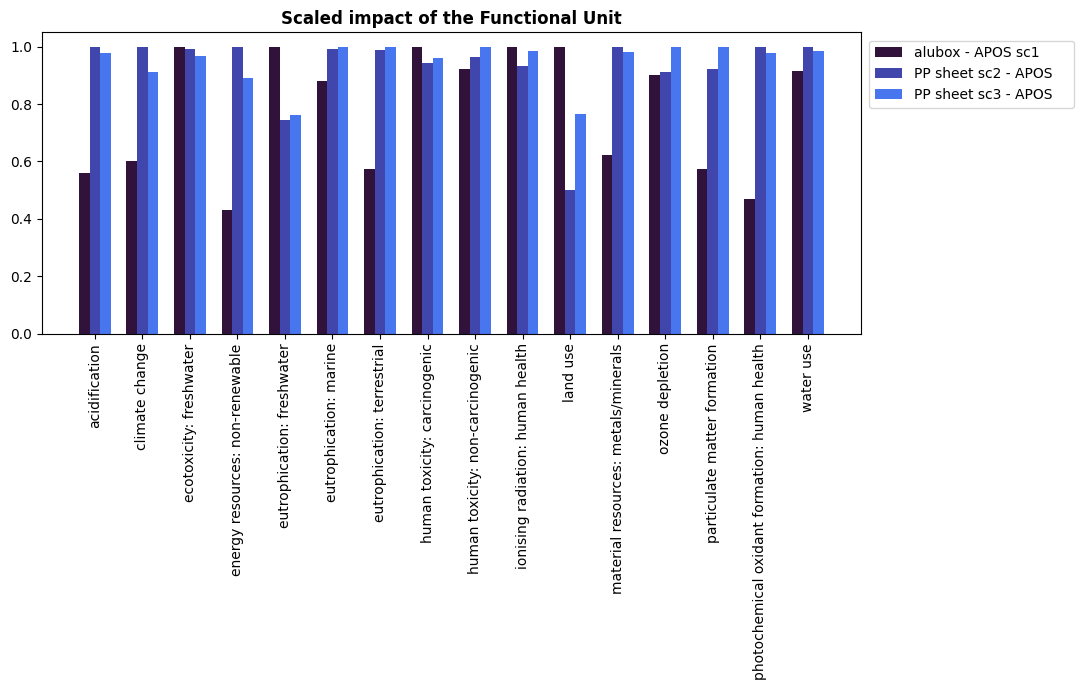

In [50]:
# Plotting
fig, ax = plt.subplots(figsize=(9,7))

num_processes = len(df_scaled)
bar_width = 1/(len(index_list) + 1.5) 
index = np.arange(len(columns_to_plot))

# Plotting each group of bars
min_val = 0
for i, process in enumerate(df_scaled.index):
    values = df_scaled.loc[process, columns_to_plot].values
    ax.bar((index + i * bar_width), values, bar_width, label=process, color=colors[i])  
    print(min(values))
    if min_val > min(values):
        min_val = min(values)


# Setting labels and title
ax.set_title('Scaled impact of the Functional Unit',weight='bold')
ax.set_xticks(index + bar_width )
ax.set_xticklabels(plot_x_axis)
plt.xticks(rotation=90)
# plt.yticks(np.arange(-1.6, 1.01, step=0.2))
# plt.ylim(-1.52,1.03)

ax.legend(flow_legend,bbox_to_anchor=(1.01, .75, .25, 0), loc="lower left",
            mode="expand", borderaxespad=0,  ncol=1)
plt.tight_layout()
# plt.savefig(os.path.join(save_dir, img_res), bbox_inches='tight')
plt.show()

In [34]:
directory = 'C:\\Users\\ruw\\Desktop\\RA\\'
lst_scaled = lc.LCIA_normalization(directory, df_tot)

In [35]:
lst_scaled

[0.6484634229362394, 1.0, 0.9462859204664091]

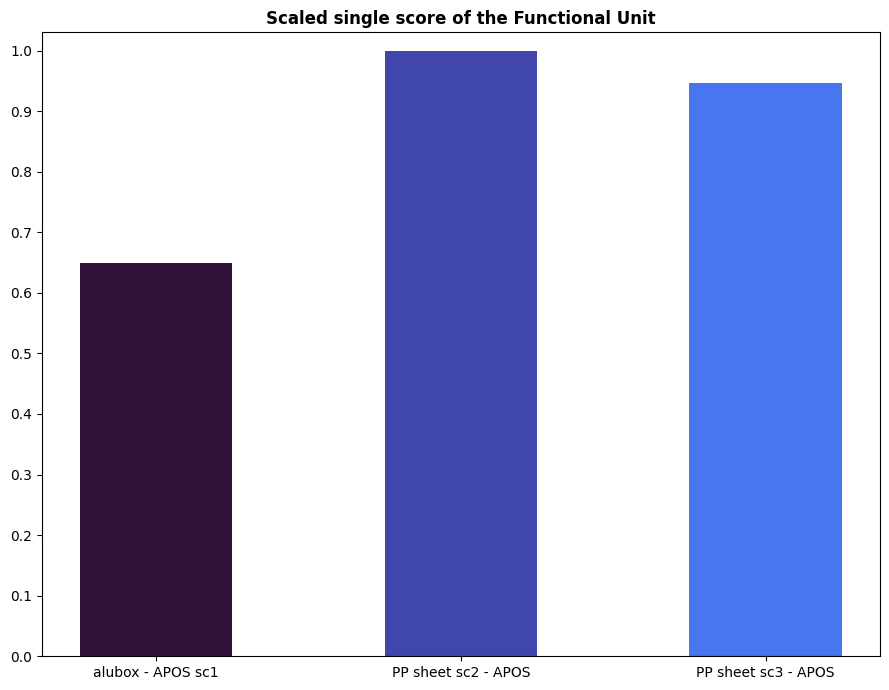

In [36]:
# Plotting
fig, ax = plt.subplots(figsize=(9,7))

num_processes = len(lst_scaled)
bar_width = 1/(len(index_list)-1) 
index = np.arange(len(index_list))   

ax.bar(index + bar_width, lst_scaled, bar_width, label=index_list, color=colors)

# Setting labels and title
ax.set_title('Scaled single score of the Functional Unit',weight='bold')
ax.set_xticks(index + bar_width )
ax.set_xticklabels(flow_legend)
#plt.xticks(rotation=90)
plt.yticks(np.arange(0, 1.01, step=0.1))
plt.ylim(0,1.03)

plt.tight_layout()
# plt.savefig(os.path.join(save_dir, img_res), bbox_inches='tight')
plt.show()

In [37]:
# Ensure the legend displays items in the category order
ordered_legend = {key: [] for key in category_mapping}

for x_lst in range(len(x_axis)):
    for x in range(len(x_axis[x_lst])):
        
        for key, item in category_mapping.items():
                #print(x_axis[x_lst][x], item, x_axis[x_lst][x] in item)
                if x_axis[x_lst][x] in item:
                    # print(x_axis[x_lst][x], item, x_lst, x)
                    ordered_legend[key].append(x_axis[x_lst][x])

plot_legend = {key: [] for key in category_mapping}
temp = []

for key,value in ordered_legend.items():
    #print(key, value)
    for val in value:
        if val not in temp:
            temp.append(val)
            # print(val)
            plot_legend[key].append(val)

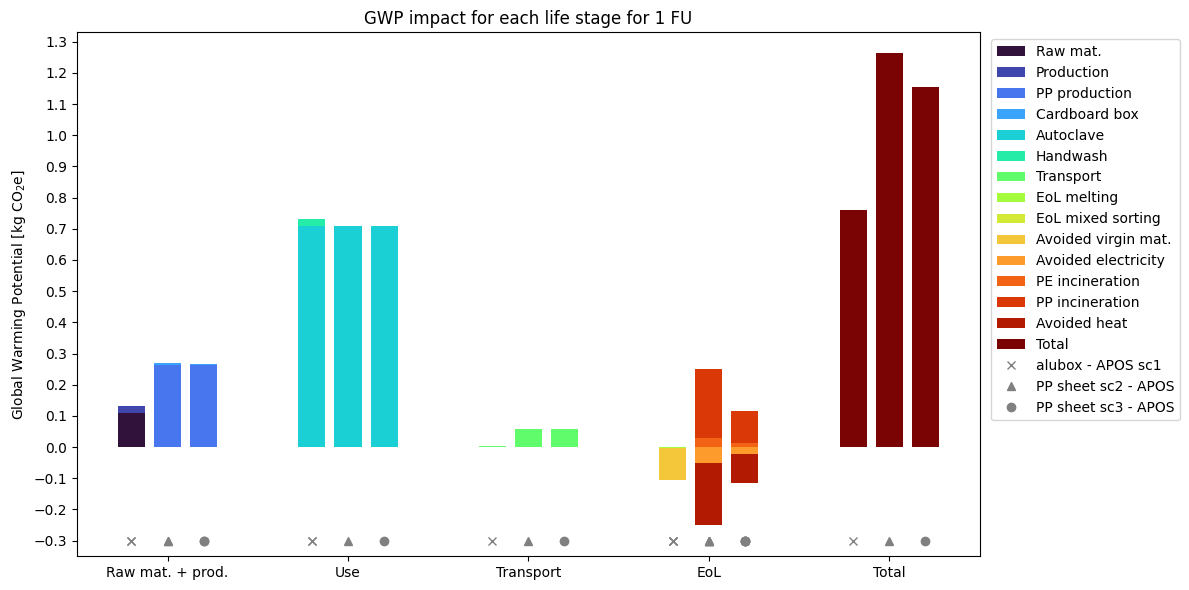

In [55]:

color_map = {}
#unique_processes = {process for sublist in x_axis for process in sublist}
for i, process in enumerate(temp):
    color_map[process] = colors[i]
    #print(process, i)



# Initialize an ordered dictionary for legend_handles to maintain the order
legend_handles = OrderedDict()

# Initialize legend_handles with keys from plot_legend and empty lists
for process in temp:
    legend_handles[process] = None

# Plotting logic
if len(x_axis) == len(GWP_value):
    num_scenarios = len(GWP_value)  # Number of scenarios
    bar_width = 0.15  # Width of the bars for each scenario
    space_between_scenarios = 0.05  # Space between each scenario set
    index = np.arange(len(categories))  # X-axis index positions for the categories

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))

    idx = ['x', '^', 'o']  # List of markers for scenarios
    all_markers = []  # List to store Line2D objects for markers

    # Main plotting logic
    for scenario in range(num_scenarios):
        bottom_positive = np.zeros(len(categories))  # Initialize the bottom array for positive values
        bottom_negative = np.zeros(len(categories))  # Initialize the bottom array for negative values
        scenario_index = index + scenario * (bar_width + space_between_scenarios)

        for length in range(len(x_axis[scenario])):
            process_name = x_axis[scenario][length]
            value = GWP_value[scenario][length]

            # Determine which category this process falls into
            for i, category in enumerate(categories):
                if any(keyword in process_name for keyword in category_mapping[category]):
                    # Assign color based on the process name
                    color = color_map[process_name]

                    # Create a bar with the specific color
                    if value >= 0:
                        bar = ax.bar(scenario_index[i], value, bar_width,
                                    label=f"{process_name}" if legend_handles[process_name] is None else "",
                                    bottom=bottom_positive[i],
                                    color=color)
                        bottom_positive[i] += value
                    else:
                        bar = ax.bar(scenario_index[i], value, bar_width,
                                    label=f"{process_name}" if legend_handles[process_name] is None else "",
                                    bottom=bottom_negative[i],
                                    color=color)
                        bottom_negative[i] += value

                    # Add the bar to the corresponding process in legend_handles
                    if legend_handles[process_name] is None:
                        legend_handles[process_name] = bar

                    # Add plot markers (symbols) at the bottom
                    ax.plot(scenario_index[i], -0.3, marker=idx[scenario], color='gray')

                    break

    # Add custom markers to the legend
    for i, marker in enumerate(idx):
        all_markers.append(Line2D([0], [0], marker=marker, color='gray', label=f'Scenario {i + 1}', linestyle='None'))

    # Set x-axis labels and ticks, adjusting to account for spacing
    tick_positions = index + (num_scenarios - 1) * (bar_width + space_between_scenarios) / 2
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(categories)

    # Axis limits
    ax.set_ylim(-.35, 1.33)
    ax.set_yticks(np.arange(-0.3, 1.31, step=0.1))
    ax.set_ylabel("Global Warming Potential [kg CO$_2$e]")
    ax.set_title('GWP impact for each life stage for 1 FU')

    # Add markers to legend_handles for display at the bottom of the legend
    valid_legend_handles = [(k, v) for k, v in legend_handles.items() if v is not None]
    legend_handles_for_display = valid_legend_handles + [(flow_legend[i], marker) for i, marker in enumerate(all_markers)]

    if legend_handles_for_display:
        ax.legend(handles=[v for k, v in legend_handles_for_display], labels=[k for k, v in legend_handles_for_display], bbox_to_anchor=(1.005, 1), loc='upper left')

    plt.tight_layout()
    #plt.savefig(os.path.join(save_dir, f'LC_impact_ofir_APOS.jpg'), bbox_inches='tight')
    plt.show()
    

else:
    print('The x-axis and GWP values have different sizes')


In [56]:
def node_name_update(node):
    if '- APOS - sc 1' in node:
        node = node.replace(f' - APOS - sc 1', '')
        if  'avoided alubox raw materials' in node:
            node = 'Avoided raw mat.'
        elif 'melting' in node:
            node = 'Melting'
        elif 'mixed sorting' in node:
            node = 'Mixed sorting'
        elif 'prod' in node:
            node = 'Alubox prod.'
        else:
            node = node.title()
    elif 'wrought alloy' in node:
        node = 'Virgin alu'
    elif 'steel production' in node:
        node = 'Virgin steel'
    elif 'impact extrusio' in node:
        node = 'Alu impact extrusion'
    elif 'corrugated' in node:
        node = 'Cardboard box'
    elif 'anodising' in node:
        node = 'Alu anodising'
    elif 'transport' in node:
        node = 'Transport'
    
    return node

In [57]:
def source_name_update(process, source):
        
    if 'wrought alloy' in source:
        source = 'Alu wrought alloy'
    elif 'steel production' in source:
        source = 'Virgin steel'
    elif 'anodising' in source:
        source = 'Alu anodising'
    elif 'impact extrusio' in source:
        source = 'Alu impact extrusion'
    elif 'transport' in source:
        source = 'Transport'
    elif 'corrugated' in source:
        source = 'Cardboard box'
    elif 'metal working' in source:
        source = 'Steel manufacturing'
    elif 'sheet rolling' in source:
        source = 'Alu sheet rolling'
    elif 'recycling' in source:
        if 'mixed sorting' in process.lower():
            source = 'Mixed metal scrap'
        else:
            source = 'Alu remelting'
    elif 'autoclave' in source:
        source = 'Autoclave'
    elif 'Handwash' in source:
        source = 'Handwash'
    return source

In [58]:
df_c_gwp =copy.deepcopy(df_c)
c = []

node_sc1 = ['Raw material','Production', 'Use', 'EoL', 'EoL Treatment']
node_sc2 = []
node_sc3 = []

links_sc1 = []
links_sc2 = []
links_sc3 = []

for i, row in df_c_gwp.iterrows():
    if 'sc 1' in i:
        # print(i)
        node = node_name_update(i)
        # if  'disinfec' not in i:
        node_sc1.append(node)
        for element in row:

            for proc in element:
                # print(proc)
                val = round(proc[1]/GWP_value[0][-1]*100,2)
                source = proc[0]
                source = source_name_update(i,source)
                # print(source)
                if   val != 0:

                    if  val < 0 and 'Cardboard' not in source:
                        # print(proc[0])
                        source = 'Avoided ' + source.lower()

                    if 'raw material' in i and 'avoided' not in source.lower():
                        print(f'{i} : Raw : {node}, source : {source}, GWP : {val}')
                        dct_temp = {"source": 'Raw material', "target": source, "value":val}
                        dct_temp2 = {"source": source, "target": 'Production', "value":val}
                        # dct_temp3 = {"source": node, "target": 'Production', "value":val}
                    if 'production' in i or 'transport' in source.lower():
                        print(f'{i} : Prod. : {node}, source : {source}, GWP : {val}')
                        dct_temp = {"source": 'Production', "target": source, "value":val}
                        dct_temp2 = {"source": source, "target": 'Use', "value":val}
                        # dct_temp3 = {"source": node, "target": 'Use', "value":val}
                    if 'autoclave' in i.lower() or 'handwash' in i.lower():
                        print(f'{i} : Use : {node}, source : {source}, GWP : {val}')
                        dct_temp = {"source": 'Use', "target": source, "value": val}
                        dct_temp2 = {"source": source, "target": 'EoL', "value": val}
                    if  'avoided' in i.lower():
                        
                        if 'alu' in source.lower():
                            val = round(val * 0.95, 2) 
                        elif 'steel' in source.lower():
                            val = round(val * 0.65, 2) 
                        print(f'{i} : EoL : {node}, source : {source}, GWP : {val}')
                        dct_temp = {"source": 'EoL', "target": source, "value":val}
                        dct_temp2 = {"source": source, "target": node, "value":val}
                    if 'eol' in i.lower() and 'avoided' not in i.lower():
                        print(f'{i} : EoL : {node}, source : {source}, GWP : {val}')
                        dct_temp = {"source": 'EoL', "target": source, "value":val}
                        dct_temp2 = {"source": source, "target": 'EoL Treatment', "value":val}

                
                    links_sc1.append(dct_temp)
                    links_sc1.append(dct_temp2)
                    # if dct_temp3 not in links_sc1:
                    #     links_sc1.append(dct_temp3)
                    node_sc1.append(source)


alubox raw materials - APOS - sc 1 : Raw : Alubox Raw Materials, source : Alu wrought alloy, GWP : 13.23
alubox raw materials - APOS - sc 1 : Raw : Alubox Raw Materials, source : Virgin steel, GWP : 1.07
alubox production - APOS - sc 1 : Prod. : Alubox prod., source : Alu anodising, GWP : 0.61
alubox production - APOS - sc 1 : Prod. : Alubox prod., source : Alu impact extrusion, GWP : 1.32
alubox production - APOS - sc 1 : Prod. : Alubox prod., source : Cardboard box, GWP : 0.08
alubox production - APOS - sc 1 : Prod. : Alubox prod., source : Steel manufacturing, GWP : 0.48
alubox production - APOS - sc 1 : Prod. : Alubox prod., source : Alu sheet rolling, GWP : 0.47
autoclave - APOS - sc 1 : Use : Autoclave, source : Autoclave, GWP : 10.36
Handwash - APOS - sc 1 : Use : Handwash, source : Handwash, GWP : 3.03
alubox EoL melting - APOS - sc 1 : EoL : Melting, source : Avoided alu remelting, GWP : -0.55
alubox EoL mixed sorting - APOS - sc 1 : EoL : Mixed sorting, source : Mixed metal s

In [59]:
len(node_sc1)

27

In [60]:
colors

[(0.18995, 0.07176, 0.23217, 1.0),
 (0.25618, 0.27412, 0.67381, 1.0),
 (0.27698, 0.46153, 0.93309, 1.0),
 (0.22676, 0.63913, 0.98851, 1.0),
 (0.10738, 0.81381, 0.83484, 1.0),
 (0.14391, 0.9268, 0.65448, 1.0),
 (0.38127, 0.98909, 0.42386, 1.0),
 (0.64362, 0.98999, 0.23356, 1.0),
 (0.82333, 0.91253, 0.20663, 1.0),
 (0.9556, 0.78005, 0.22836, 1.0),
 (0.99672, 0.60977, 0.17842, 1.0),
 (0.95398, 0.38836, 0.08362, 1.0),
 (0.8538, 0.2217, 0.02677, 1.0),
 (0.6965, 0.10102, 0.00522, 1.0),
 (0.4796, 0.01583, 0.01055, 1.0)]

In [61]:
color_links = []
color_nodes = []
for c in colors:
    c_link = list(c)  # Convert tuple to list if needed
    c_node = list(c)

    c_link[-1] = 0.3  # Update the last element
    c_node[-1] = 0.9

    color_links.append(tuple(c_link))  # Add the updated list to c_new
    color_nodes.append(tuple(c_node))

color_nodes

[(0.18995, 0.07176, 0.23217, 0.9),
 (0.25618, 0.27412, 0.67381, 0.9),
 (0.27698, 0.46153, 0.93309, 0.9),
 (0.22676, 0.63913, 0.98851, 0.9),
 (0.10738, 0.81381, 0.83484, 0.9),
 (0.14391, 0.9268, 0.65448, 0.9),
 (0.38127, 0.98909, 0.42386, 0.9),
 (0.64362, 0.98999, 0.23356, 0.9),
 (0.82333, 0.91253, 0.20663, 0.9),
 (0.9556, 0.78005, 0.22836, 0.9),
 (0.99672, 0.60977, 0.17842, 0.9),
 (0.95398, 0.38836, 0.08362, 0.9),
 (0.8538, 0.2217, 0.02677, 0.9),
 (0.6965, 0.10102, 0.00522, 0.9),
 (0.4796, 0.01583, 0.01055, 0.9)]

In [62]:
sankey_color = colors



In [63]:
list(sankey_color[0])

[0.18995, 0.07176, 0.23217, 1.0]

In [64]:
df_c_gwp =copy.deepcopy(df_c)
c = []

node_sc1 = ['Raw material','Production', 'Use', 'EoL', 'EoL Treatment']
node_sc2 = []
node_sc3 = []



links_sc1 = []
links_sc2 = []
links_sc3 = []

node_colors_links = {}
node_colors = {}

link_opacity = 0.3
node_opacity = 0.9

for c in node_sc1:
    node_colors_links[c] =color_links[6]

for i, row in df_c_gwp.iterrows():
    if 'sc 1' in i:
        # print(i)
        node = node_name_update(i)
        # if  'disinfec' not in i:
        node_sc1.append(node)
        for element in row:

            for proc in element:
                # print(proc)
                val = round(proc[1]/GWP_value[0][-1]*100,2)
                source = proc[0]
                source = source_name_update(i,source)
                # print(source)
                if   val != 0:
                    node_colors_links[source] = color_links[6]
                    if  val < 0 and 'Cardboard' not in source:
                        # print(proc[0])
                        source = 'Avoided ' + source.lower()

                        node_colors_links[source] = color_links[-3]
                    if 'raw material' in i and 'avoided' not in source.lower():
                        print(f'{i} : Raw : {node}, source : {source}, GWP : {val}')
                        dct_temp = {"source": 'Raw material', "target": source, "value":val}
                        dct_temp2 = {"source": source, "target": 'Production', "value":val}
                        # dct_temp3 = {"source": node, "target": 'Production', "value":val}
                    if 'production' in i or 'transport' in source.lower():
                        print(f'{i} : Prod. : {node}, source : {source}, GWP : {val}')
                        dct_temp = {"source": 'Production', "target": source, "value":val}
                        dct_temp2 = {"source": source, "target": 'Use', "value":val}
                        # dct_temp3 = {"source": node, "target": 'Use', "value":val}
                    if 'autoclave' in i.lower() or 'handwash' in i.lower():
                        print(f'{i} : Use : {node}, source : {source}, GWP : {val}')
                        dct_temp = {"source": 'Use', "target": source, "value": val}
                        dct_temp2 = {"source": source, "target": 'EoL', "value": val}
                    if  'avoided' in i.lower():
                        
                        if 'alu' in source.lower():
                            val = round(val * 0.95, 2) 
                        elif 'steel' in source.lower():
                            val = round(val * 0.65, 2) 
                        print(f'{i} : EoL : {node}, source : {source}, GWP : {val}')
                        dct_temp = {"source": 'EoL', "target": source, "value":val}
                        dct_temp2 = {"source": source, "target": node, "value":val}
                    if 'eol' in i.lower() and 'avoided' not in i.lower():
                        print(f'{i} : EoL : {node}, source : {source}, GWP : {val}')
                        dct_temp = {"source": 'EoL', "target": source, "value":val}
                        dct_temp2 = {"source": source, "target": 'EoL Treatment', "value":val}

                
                    links_sc1.append(dct_temp)
                    links_sc1.append(dct_temp2)
                    # if dct_temp3 not in links_sc1:
                    #     links_sc1.append(dct_temp3)
                    node_sc1.append(source)


alubox raw materials - APOS - sc 1 : Raw : Alubox Raw Materials, source : Alu wrought alloy, GWP : 13.23
alubox raw materials - APOS - sc 1 : Raw : Alubox Raw Materials, source : Virgin steel, GWP : 1.07
alubox production - APOS - sc 1 : Prod. : Alubox prod., source : Alu anodising, GWP : 0.61
alubox production - APOS - sc 1 : Prod. : Alubox prod., source : Alu impact extrusion, GWP : 1.32
alubox production - APOS - sc 1 : Prod. : Alubox prod., source : Cardboard box, GWP : 0.08
alubox production - APOS - sc 1 : Prod. : Alubox prod., source : Steel manufacturing, GWP : 0.48
alubox production - APOS - sc 1 : Prod. : Alubox prod., source : Alu sheet rolling, GWP : 0.47
autoclave - APOS - sc 1 : Use : Autoclave, source : Autoclave, GWP : 10.36
Handwash - APOS - sc 1 : Use : Handwash, source : Handwash, GWP : 3.03
alubox EoL melting - APOS - sc 1 : EoL : Melting, source : Avoided alu remelting, GWP : -0.55
alubox EoL mixed sorting - APOS - sc 1 : EoL : Mixed sorting, source : Mixed metal s

In [65]:
node_colors_links

{'Raw material': (0.38127, 0.98909, 0.42386, 0.3),
 'Production': (0.38127, 0.98909, 0.42386, 0.3),
 'Use': (0.38127, 0.98909, 0.42386, 0.3),
 'EoL': (0.38127, 0.98909, 0.42386, 0.3),
 'EoL Treatment': (0.38127, 0.98909, 0.42386, 0.3),
 'Alu wrought alloy': (0.38127, 0.98909, 0.42386, 0.3),
 'Virgin steel': (0.38127, 0.98909, 0.42386, 0.3),
 'Alu anodising': (0.38127, 0.98909, 0.42386, 0.3),
 'Alu impact extrusion': (0.38127, 0.98909, 0.42386, 0.3),
 'Cardboard box': (0.38127, 0.98909, 0.42386, 0.3),
 'Steel manufacturing': (0.38127, 0.98909, 0.42386, 0.3),
 'Alu sheet rolling': (0.38127, 0.98909, 0.42386, 0.3),
 'Autoclave': (0.38127, 0.98909, 0.42386, 0.3),
 'Handwash': (0.38127, 0.98909, 0.42386, 0.3),
 'Alu remelting': (0.38127, 0.98909, 0.42386, 0.3),
 'Avoided alu remelting': (0.8538, 0.2217, 0.02677, 0.3),
 'Mixed metal scrap': (0.38127, 0.98909, 0.42386, 0.3),
 'Transport': (0.38127, 0.98909, 0.42386, 0.3),
 'Avoided alu wrought alloy': (0.8538, 0.2217, 0.02677, 0.3),
 'Avoided

In [67]:

# Create a Sankey diagram
fig = go.Figure()

# Calculate the scale factor for link thickness and node size
max_value = max(abs(link['value']) for link in links_sc1)
scale_factor = 1  # You can adjust this factor to control the scaling

# Calculate total outflow for each node and round to 2 decimals
outflow_totals = {node: round(sum(link['value'] for link in links_sc1 if link['source'] == node), 2) for node in node_sc1}

# Calculate total inflow for each node and round to 2 decimals
inflow_totals = {node: round(sum(link['value'] for link in links_sc1 if link['target'] == node), 2) for node in node_sc1}

# Determine if a node has only incoming flows
incoming_only = {node: inflow_totals[node] > 0 and outflow_totals[node] == 0 for node in node_sc1}

# Calculate y-coordinates for nodes based on total outflow or inflow
node_y_coordinates = [sum(inflow_totals[node] if incoming_only[node] else outflow_totals[node] for node in node_sc1[:i]) for i in range(len(node_sc1))]
incoming_only['Avoided raw mat.'] = True
incoming_only['EoL Treatment'] = True
# incoming_only['Avoided chromium steel'] = True

# Add links
fig.add_trace(go.Sankey(
    node=dict(
        pad=50,
        thickness=10,
        line=dict(width=[abs(link['value']) / max_value * scale_factor for link in links_sc1]),
        label=[f"{node}<br>{inflow_totals[node] if incoming_only[node] else outflow_totals[node]}%" for node in node_sc1],
        #color=[node_colors.get(node, 'rgba(255, 255, 255, {})') for node in node_sc1],
    ),
    link=dict(
        source=[node_sc1.index(link['source']) for link in links_sc1],
        target=[node_sc1.index(link['target']) for link in links_sc1],
        value=[abs(link['value']) for link in links_sc1],
        # color=[node_colors_links[link['source']] for link in links_sc1],  # Use source node color for links
        line=dict(width=[abs(link['value']) / max_value * scale_factor for link in links_sc1]),
    ),
    arrangement="perpendicular",
    domain=dict(x=[0, 1], y=[0, 1]),
))


# Show the figure
fig.show()
# fig.write_image("Sankey_alubox_consq.jpg")
